In [1]:
# %% load libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# %% prepare data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]

# add z-score
df['mpg_z'] = (x - x.mean())/x.std()

# Quetion: what's the rationale for using z-scores?
# Z-scores have appealing properties: a) E(z) = 0; b) SD(z) = 1 
# In other words: it's clear what 'high' values (Mean  + 1 SD = 1)  and 'low' values (Mean  -1 SD = -1)
# Divergence means departure from a reference point tipically the mean that is E(z) = 0

# add color
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]

# sort from smallest to largest value
df.sort_values('mpg_z', inplace=True)
# reset the index - so we can plot the z-score from small to big
df.reset_index(inplace=True)

In [6]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


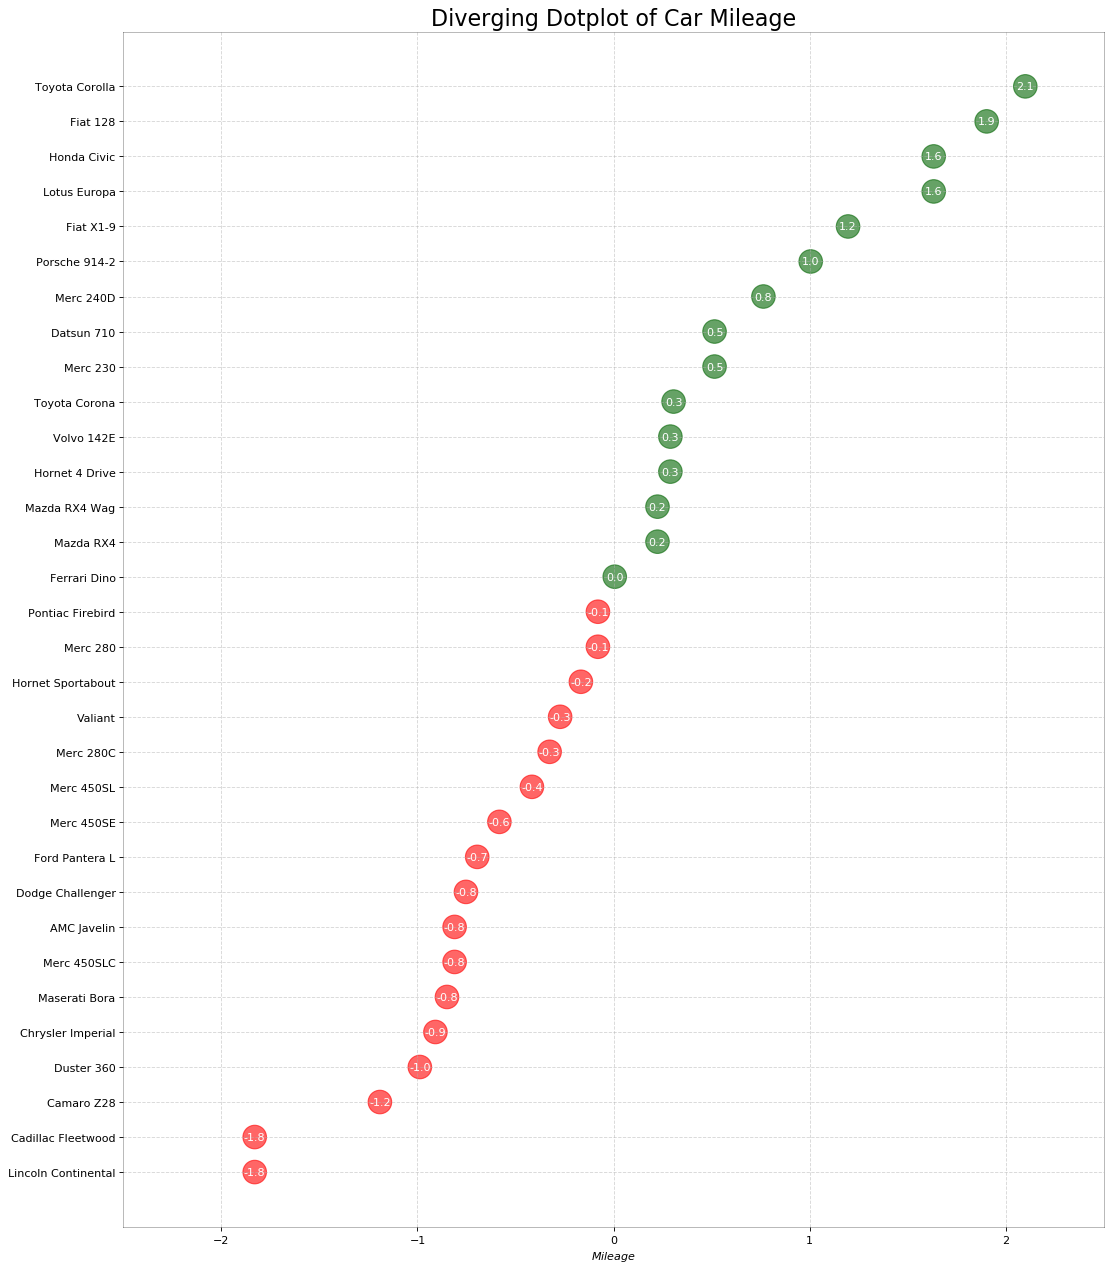

In [9]:
# %% draw plot

# create plot
fig = plt.figure(figsize=(14,16), dpi= 80)   # dpi = resolution, higher = heavier file 

# create plot
ax = fig.add_subplot(1, 1, 1)

# scatter
ax.scatter(x=df.mpg_z, y=df.index, s=450, alpha=.6, color=df.colors)   # color is defined in the df

# adding the z-score on each scatter point
for x, y, label in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(label, 1), horizontalalignment='center',     # x & y defines the location of the z-score
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

# axes
plt.yticks(df.index, df.cars)   # chaging the y-tick from index 0,1,2... to car models
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')

# grid
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)

# save plot
plt.tight_layout()
# plt.savefig(os.path.join(os.getcwd(), 'diverging_plot_0.pdf'))

# show plot
plt.show()